In [1]:
# Import the packages

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# I found this dataset with a random google search for logistic regression

data = pd.read_csv("https://raw.githubusercontent.com/bbalazs88/Sample_Files/master/logreg_dataset.csv")

In [3]:
# Let's examine the data. We won't need the User ID / Unnamed : 0 column, and we have to convert 
# the Gender values to 0/1 for the model.

data.head()

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,0,15624510,Male,19,19000,0
1,1,15810944,Male,35,20000,0
2,2,15668575,Female,26,43000,0
3,3,15603246,Female,27,57000,0
4,4,15804002,Male,19,76000,0


In [4]:
data.drop(["Unnamed: 0", "User ID"], axis=1, inplace=True)

In [5]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
# Converting the Gender, with Pandas' map function. I could use the get_dummies, or scikit-learn's OneHotEncoder.

data['Gender'] = data['Gender'].map({'Female' : 0, 'Male' : 1})

In [9]:
# Now our data is clean, so we can move on to the LogReg model.

data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
# Train and test data also should be Scaled, the score went from 0.6625 (default logreg) to 0.8875 with it.
# To suppress the StandardScaler message of converting the int64 to float64, I made the conversion before. 
# After I put stratify in the mix, -which makes sure that the proportion of 0/1-s are equal in the train/test set- 
# My accuracy went down to 0.8125, which could be okay still.

scaler = StandardScaler()
scaler.fit(data.iloc[:, 0:3].astype("float64", inplace=True))

samples_scaled = scaler.transform(data.iloc[:, 0:3].astype("float64", inplace=True))

In [11]:
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data[['Purchased']].values.ravel()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(samples_scaled, y, test_size=0.2, random_state=42, stratify=y) 

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bbalogh7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
predictions = logreg.predict(X_test)

In [16]:
score = logreg.score(X_test, y_test)
score

0.8125

In [17]:
# Just a visual proof of our predictions and the original test data compared to eachother.

print("Predictions: \n", predictions[0:40])
print("Test data: \n", y_test[0:40])

Predictions: 
 [1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1
 0 1 0]
Test data: 
 [1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1
 0 0 1]


[[18 11]
 [ 4 47]]


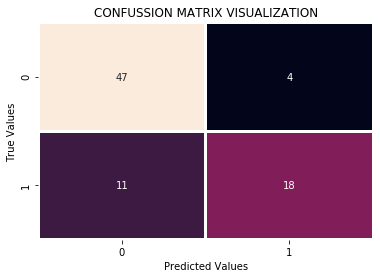

In [18]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, predictions, labels=[1,0]))

sns.heatmap(confusion_matrix(y_test, predictions),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()